### Downloading Keras Tuner

In [1]:
!pip install -q -U keras-tuner

     |████████████████████████████████| 71kB 3.9MB/s 


### Importing necessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from tensorflow import keras
from tensorflow.keras.layers import Dense
from kerastuner.tuners import RandomSearch

### Checking for CPU/GPU

In [3]:
devices = [ "CPU" , "GPU" ]
for device in devices:
  out = tf.config.list_physical_devices ( device )
  if len ( out ) > 0:
    print ( device , "is available." )
    print ( device )
  else:
    print ( device , "is not available." )

CPU is available.
CPU
GPU is available.
GPU


### Checking the GPU configuration

In [4]:
!nvidia-smi

Thu Jan 28 15:35:11 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    25W / 250W |     10MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Importing and viewing the Churn data

In [5]:
data = pd.read_csv ( "/content/Churn_Modelling.csv" )

In [6]:
data.head ( )

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Splitting the data into X and y

In [7]:
X = data.drop ( "Exited" , axis = 1 )
y = data [ "Exited" ]

### Dimensions of data

In [8]:
print ( "Rows: {}\tColumns: {}" .format ( data.shape [ 0 ] , data.shape [ 1 ] ) )

Rows: 10000	Columns: 14


### Checking the null values

In [9]:
data.isnull ( ).sum ( )

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Information related to features

In [10]:
data.info ( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Dropping the unnecessary columns

In [11]:
X.drop ( [ "RowNumber" , "CustomerId" , "Surname" ] , axis = 1 , inplace = True )

### Creating dummies for Geography and Gender

In [12]:
X = pd.get_dummies ( X , columns = [ "Geography" , "Gender" ] , drop_first = True )
X.head ( )

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


### Performing the Train-Test split

In [13]:
X_train , X_test , y_train , y_test = train_test_split ( X , y , test_size = 0.2 , random_state = 37 )

### Scaling all the features using StandardScaler

In [14]:
ss = StandardScaler ( )
X_train = ss.fit_transform ( X_train )
X_test = ss.transform ( X_test )

### Creating an Artificial Neural Network (ANN)

In [15]:
layers = [ tf.keras.layers.Dense ( 10 , kernel_initializer = "he_uniform" , activation = "relu" , input_shape = X_train.shape [ 1 : ] ) ,
          tf.keras.layers.Dense ( 10 , kernel_initializer = "he_uniform" , activation = "relu" ) , 
          tf.keras.layers.Dense ( 1 , kernel_initializer = "glorot_uniform" , activation = "sigmoid" ) ]
model = tf.keras.models.Sequential ( layers )
model.compile ( optimizer = "adam" , loss = "binary_crossentropy" , metrics = [ "accuracy" ] )

In [16]:
model.summary ( )

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = model.fit ( X_train , y_train , epochs = 50 , validation_split = 0.2 , batch_size = 100 )

Epoch 1/50
64/64 [==============================] - 2s 7ms/step - loss: 1.7612 - accuracy: 0.2073 - val_loss: 1.1584 - val_accuracy: 0.2269
Epoch 2/50
64/64 [==============================] - 0s 2ms/step - loss: 1.0297 - accuracy: 0.2848 - val_loss: 0.7919 - val_accuracy: 0.4538
Epoch 3/50
64/64 [==============================] - 0s 4ms/step - loss: 0.7446 - accuracy: 0.5054 - val_loss: 0.6539 - val_accuracy: 0.6762
Epoch 4/50
64/64 [==============================] - 0s 2ms/step - loss: 0.6295 - accuracy: 0.7123 - val_loss: 0.5965 - val_accuracy: 0.7613
Epoch 5/50
64/64 [==============================] - 0s 2ms/step - loss: 0.5842 - accuracy: 0.7726 - val_loss: 0.5611 - val_accuracy: 0.7875
Epoch 6/50
64/64 [==============================] - 0s 2ms/step - loss: 0.5420 - accuracy: 0.7955 - val_loss: 0.5330 - val_accuracy: 0.7931
Epoch 7/50
64/64 [==============================] - 0s 3ms/step - loss: 0.5177 - accuracy: 0.7977 - val_loss: 0.5097 - val_accuracy: 0.7956
Epoch 8/50
64/64 [==

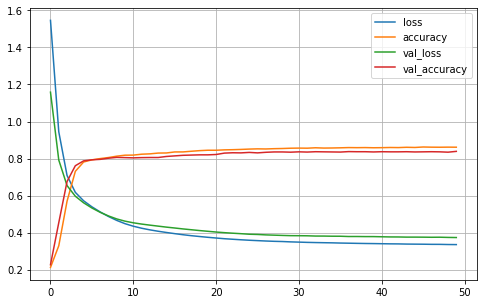

In [18]:
pd.DataFrame ( history.history ).plot ( figsize = ( 8 , 5 ) )
plt.grid ( True )
plt.show ( )

### Model Evaluation

In [19]:
model.evaluate ( X_test , y_test )

63/63 [==============================] - 0s 2ms/step - loss: 0.3673 - accuracy: 0.8515


[0.3673473000526428, 0.8514999747276306]

### Predicting the first 5 samples

In [20]:
model.predict ( X_test [ : 5 ] )

array([[0.25750652],
       [0.25525156],
       [0.99950254],
       [0.01814072],
       [0.79378307]], dtype=float32)

In [21]:
confusion_matrix ( y_test , model.predict ( X_test ) > 0.5 )

array([[1524,   76],
       [ 221,  179]])

### Keras Tuner for hyperparameter optimization

In [26]:
def build_model ( hp ):
  model = keras.Sequential ( )
  for i in range ( hp.Int ( "num_layers" , 2 , 20 ) ):
    model.add ( Dense ( units = hp.Int ( "units_" + str ( i ) , 
                                               min_value = 32 , 
                                               max_value = 512 , 
                                               step = 32 ) , 
                                               activation = "relu" ) )
  model.add ( Dense ( 1 , activation = "sigmoid" ) )
  model.compile ( loss = "binary_crossentropy" , 
                 metrics = [ "accuracy" ] , 
                 optimizer = keras.optimizers.Adam ( hp.Choice ( "learning_rate" , [ 1e-02 , 1e-3 , 1e-4 ] ) ) )
  return model

In [27]:
tuner = RandomSearch ( build_model , 
                      objective = "val_accuracy" , 
                      max_trials = 5 , 
                      executions_per_trial = 3 , 
                      directory = "Logs" , 
                      project_name = "Churn" )

In [28]:
tuner.search_space_summary ( )

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [29]:
tuner.search ( X_train , y_train , 
              epochs = 5 , 
              validation_data = ( X_test , y_test ) )

Trial 5 Complete [00h 00m 16s]
val_accuracy: 0.8538333376248678

Best val_accuracy So Far: 0.8565000096956888
Total elapsed time: 00h 01m 05s
INFO:tensorflow:Oracle triggered exit


In [30]:
tuner.results_summary ( )

Results summary
Results in Logs/Churn
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
num_layers: 5
units_0: 224
units_1: 192
learning_rate: 0.0001
units_2: 64
units_3: 256
units_4: 352
units_5: 384
units_6: 288
units_7: 320
units_8: 448
units_9: 320
Score: 0.8565000096956888
Trial summary
Hyperparameters:
num_layers: 10
units_0: 480
units_1: 256
learning_rate: 0.01
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
units_9: 32
Score: 0.8545000155766805
Trial summary
Hyperparameters:
num_layers: 7
units_0: 128
units_1: 288
learning_rate: 0.0001
units_2: 160
units_3: 512
units_4: 32
units_5: 480
units_6: 416
units_7: 96
units_8: 416
units_9: 128
Score: 0.8538333376248678
Trial summary
Hyperparameters:
num_layers: 16
units_0: 480
units_1: 288
learning_rate: 0.001
units_2: 128
units_3: 320
units_4: 352
units_5: 352
units_6: 384
units_7: 64
units_8: 32
units_9: 64
units_10: 32
units_11: 32
units_12: 32
u

### Downloading files as zip format

In [31]:
 !zip -r Logs.zip Logs/

  adding: Logs/ (stored 0%)
  adding: Logs/Churn/ (stored 0%)
  adding: Logs/Churn/trial_681054b7f34382f3db3ff038e1f96a90/ (stored 0%)
  adding: Logs/Churn/trial_681054b7f34382f3db3ff038e1f96a90/checkpoints/ (stored 0%)
  adding: Logs/Churn/trial_681054b7f34382f3db3ff038e1f96a90/checkpoints/epoch_0/ (stored 0%)
  adding: Logs/Churn/trial_681054b7f34382f3db3ff038e1f96a90/checkpoints/epoch_0/checkpoint.data-00000-of-00001 (deflated 19%)
  adding: Logs/Churn/trial_681054b7f34382f3db3ff038e1f96a90/checkpoints/epoch_0/checkpoint (deflated 48%)
  adding: Logs/Churn/trial_681054b7f34382f3db3ff038e1f96a90/checkpoints/epoch_0/checkpoint.index (deflated 74%)
  adding: Logs/Churn/trial_681054b7f34382f3db3ff038e1f96a90/trial.json (deflated 82%)
  adding: Logs/Churn/trial_95e6c067032fd2c78ee7d78a1d8795fd/ (stored 0%)
  adding: Logs/Churn/trial_95e6c067032fd2c78ee7d78a1d8795fd/checkpoints/ (stored 0%)
  adding: Logs/Churn/trial_95e6c067032fd2c78ee7d78a1d8795fd/checkpoints/epoch_0/ (stored 0%)
  addi